In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs

In [4]:
samsung=[]

# product chosen= Samsung M32 phone
## cust reviews url = https://www.amazon.in/Samsung-Galaxy-Prime-Light-128GB/product-reviews/B0BD3V985M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [5]:
for i in range (1,41):
    sam=[]
    url="https://www.amazon.in/Samsung-Galaxy-Prime-Light-128GB/product-reviews/B0BD3V985M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        sam.append(reviews[i].text)
    samsung=samsung+sam   

In [6]:
samsung

['\nOFFER TERMS AND CONDITIONS 1. This offer ("Offer") is a limited time promotional offer provided by Savex and is made available on the website www.amazon.in and the corresponding mobile site and mobile application (collectively, "Amazon.in") by Amazon Seller Services Private Limited ("Amazon"). 2. These Offer terms and conditions ("Offer Terms") are in addition to the Amazon.in Conditions of Use & Sale to which you agree by using Amazon.in. To the extent the Conditions of Use are inconsistent with these Offer Terms; these Offer Terms will prevail with respect to this Offer only. 3. This Offer is valid from 16th Sep ’22 to 31st Mar 2023 to (both days included) ("Offer Period"), unless extended or revoked by the Eligible Sellers in its sole discretion, without the requirement of any prior notice and without any liability. 4. During the Offer Period, non-prime customers who purchase any Galaxy M32 Prime Edition device (“Device”) from the Eligible Sellers on Amazon.in (“Eligible Custome

In [7]:
len(samsung)

360

In [8]:
rev={'review':samsung}
rev

{'review': ['\nOFFER TERMS AND CONDITIONS 1. This offer ("Offer") is a limited time promotional offer provided by Savex and is made available on the website www.amazon.in and the corresponding mobile site and mobile application (collectively, "Amazon.in") by Amazon Seller Services Private Limited ("Amazon"). 2. These Offer terms and conditions ("Offer Terms") are in addition to the Amazon.in Conditions of Use & Sale to which you agree by using Amazon.in. To the extent the Conditions of Use are inconsistent with these Offer Terms; these Offer Terms will prevail with respect to this Offer only. 3. This Offer is valid from 16th Sep ’22 to 31st Mar 2023 to (both days included) ("Offer Period"), unless extended or revoked by the Eligible Sellers in its sole discretion, without the requirement of any prior notice and without any liability. 4. During the Offer Period, non-prime customers who purchase any Galaxy M32 Prime Edition device (“Device”) from the Eligible Sellers on Amazon.in (“Eligi

In [9]:
revd=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [10]:
revd

,review
0,"\nOFFER TERMS AND CONDITIONS 1. This offer (""Offer"") is a limited time promotional offer provided by Savex and is made available on the website www.amazon.in and the corresponding mobile site and mobile application (collectively, ""Amazon.in"") by Amazon Seller Services Private Limited (""Amazon""). 2. These Offer terms and conditions (""Offer Terms"") are in addition to the Amazon.in Conditions of Use & Sale to which you agree by using Amazon.in. To the extent the Conditions of Use are inconsistent with these Offer Terms; these Offer Terms will prevail with respect to this Offer only. 3. This Offer is valid from 16th Sep ’22 to 31st Mar 2023 to (both days included) (""Offer Period""), unless extended or revoked by the Eligible Sellers in its sole discretion, without the requirement of any pri..."
1,"\nCamera : Great. No words for it's outstanding performance at price of 10,500Rs. It can even beat smartphones upto 15,000 Rs in camera department.Battery : for 45min ~ 5% charging gets discharged (used for quora, twitter, pininterest)For 18 min ~ 5% discharged(used for upto 500mb gaming apps)So, decent battery.Remember, display being amoled, full hd+ with high PPI consumes more battery.Generally, battery stays one and a half day, if used throughout the day without gaming.Display - very colourful, being amoled. But, only once I saw some colourful lines passing horizontally on display. But, that was only once. I hope it doesn't occur again.Edit : It happened because, I removed some permissions from system apps. It never happened again.Tip : Try to keep brightness low, prefer dark mode..."
2,"\nI have always liked black, this time by mistake I placed blue, but, it looks different, good. I have not thoroughly tested it yet, but with my research and and bit of usage I would ask you to go for it, under 15K 6GB/128GB variant. Yes it is not meant for gaming, yet quite good for video content experience. It is a functional device at this budget, ergonomic is up to mark, camera quality is decent, UI is smooth, tends to heat up, but natural as it has 6000MAh battery to compensate and G20 processor need. Overall I am rating it 4 out of five.\n"
3,"\n\n\n\n\n The media could not be loaded.\n \n\n\n\n Before you buy M32 just think what type of user are you.I could see so many comments complaining about the performance of this phone. But M32 was not made for gaming or multitasking. It's for people who use mobile for normal tasks rare multitasking and mostly for content viewing.Simply it's the best display for watching movies, videos and much more. No other display can show black better than a Super AMOLED. Almost perfect colour, pitch black and almost 170° viewing angles.A day long battery life.What else do you need for entertainment?Probably nothing.The cameras are good at outdoor use and may struggle indoors. Audio is more than enough both for calls and content viewing. WiFi and sim signal depend..."
4,\nI bought samsung galaxy m32 prime edition u give me three month free subscription but I am able to connect\n
...,...
355,\nFingerprint work good..battery life is good. Camera feature and quality average...this product good for parents.\n
356,
357,\nA great product if you buy this phone during the offer times\n
358,\nIt works good so far\n


In [11]:
text=''.join(revd)

In [13]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
revd["review"]=revd["review"].apply(clean_text)

In [14]:
revd

,review
0,"\noffer terms and conditions 1. this offer (""offer"") is a limited time promotional offer provided by savex and is made available on the website www.amazon.in and the corresponding mobile site and mobile application (collectively, ""amazon.in"") by amazon seller services private limited (""amazon""). 2. these offer terms and conditions (""offer terms"") are in addition to the amazon.in conditions of use & sale to which you agree by using amazon.in. to the extent the conditions of use are inconsistent with these offer terms; these offer terms will prevail with respect to this offer only. 3. this offer is valid from 16th sep ’22 to 31st mar 2023 to (both days included) (""offer period""), unless extended or revoked by the eligible sellers in its sole discretion, without the requirement of any pri..."
1,"\ncamera : great. no words for it's outstanding performance at price of 10,500rs. it can even beat smartphones upto 15,000 rs in camera department.battery : for 45min ~ 5% charging gets discharged (used for quora, twitter, pininterest)for 18 min ~ 5% discharged(used for upto 500mb gaming apps)so, decent battery.remember, display being amoled, full hd+ with high ppi consumes more battery.generally, battery stays one and a half day, if used throughout the day without gaming.display - very colourful, being amoled. but, only once i saw some colourful lines passing horizontally on display. but, that was only once. i hope it doesn't occur again.edit : it happened because, i removed some permissions from system apps. it never happened again.tip : try to keep brightness low, prefer dark mode..."
2,"\ni have always liked black, this time by mistake i placed blue, but, it looks different, good. i have not thoroughly tested it yet, but with my research and and bit of usage i would ask you to go for it, under 15k 6gb/128gb variant. yes it is not meant for gaming, yet quite good for video content experience. it is a functional device at this budget, ergonomic is up to mark, camera quality is decent, ui is smooth, tends to heat up, but natural as it has 6000mah battery to compensate and g20 processor need. overall i am rating it 4 out of five.\n"
3,"\n the media could not be loaded.\n before you buy m32 just think what type of user are you.i could see so many comments complaining about the performance of this phone. but m32 was not made for gaming or multitasking. it's for people who use mobile for normal tasks rare multitasking and mostly for content viewing.simply it's the best display for watching movies, videos and much more. no other display can show black better than a super amoled. almost perfect colour, pitch black and almost 170° viewing angles.a day long battery life.what else do you need for entertainment?probably nothing.the cameras are good at outdoor use and may struggle indoors. audio is more than enough both for calls and content viewing. wifi and sim signal depends on individual...."
4,\ni bought samsung galaxy m32 prime edition u give me three month free subscription but i am able to connect\n
...,...
355,\nfingerprint work good..battery life is good. camera feature and quality average...this product good for parents.\n
356,
357,\na great product if you buy this phone during the offer times\n
358,\nit works good so far\n


In [15]:
text=''.join(revd['review'])

In [16]:
text

'\noffer terms and conditions 1. this offer ("offer") is a limited time promotional offer provided by savex and is made available on the website www.amazon.in and the corresponding mobile site and mobile application (collectively, "amazon.in") by amazon seller services private limited ("amazon"). 2. these offer terms and conditions ("offer terms") are in addition to the amazon.in conditions of use & sale to which you agree by using amazon.in. to the extent the conditions of use are inconsistent with these offer terms; these offer terms will prevail with respect to this offer only. 3. this offer is valid from 16th sep ’22 to 31st mar 2023 to (both days included) ("offer period"), unless extended or revoked by the eligible sellers in its sole discretion, without the requirement of any prior notice and without any liability. 4. during the offer period, non-prime customers who purchase any galaxy m32 prime edition device (“device”) from the eligible sellers on amazon.in (“eligible customer

In [17]:
text_tokens=word_tokenize(text)

In [19]:
text_tokens

['offer',
 'terms',
 'and',
 'conditions',
 '1.',
 'this',
 'offer',
 '(',
 '``',
 'offer',
 "''",
 ')',
 'is',
 'a',
 'limited',
 'time',
 'promotional',
 'offer',
 'provided',
 'by',
 'savex',
 'and',
 'is',
 'made',
 'available',
 'on',
 'the',
 'website',
 'www.amazon.in',
 'and',
 'the',
 'corresponding',
 'mobile',
 'site',
 'and',
 'mobile',
 'application',
 '(',
 'collectively',
 ',',
 '``',
 'amazon.in',
 "''",
 ')',
 'by',
 'amazon',
 'seller',
 'services',
 'private',
 'limited',
 '(',
 '``',
 'amazon',
 "''",
 ')',
 '.',
 '2.',
 'these',
 'offer',
 'terms',
 'and',
 'conditions',
 '(',
 '``',
 'offer',
 'terms',
 "''",
 ')',
 'are',
 'in',
 'addition',
 'to',
 'the',
 'amazon.in',
 'conditions',
 'of',
 'use',
 '&',
 'sale',
 'to',
 'which',
 'you',
 'agree',
 'by',
 'using',
 'amazon.in',
 '.',
 'to',
 'the',
 'extent',
 'the',
 'conditions',
 'of',
 'use',
 'are',
 'inconsistent',
 'with',
 'these',
 'offer',
 'terms',
 ';',
 'these',
 'offer',
 'terms',
 'will',
 'prevai

In [21]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [22]:
tf=TfidfVectorizer()

In [23]:
text_tf=tf.fit_transform(text_without_sw)

In [25]:
feature_names=tf.get_feature_names_out()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [26]:
df

,00,000,10,11,12,128gb,13,14,15,15k,...,what,whatsoever,wholly,wifi,withdrawn,words,work,works,www,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
words_list=" ".join(df)

In [28]:
words_list

'00 000 10 11 12 128gb 13 14 15 15k 16 16th 17 170 18 19 20 2023 21 22 23 2gb 31st 459 45min 500mb 500rs 6000mah 660 662 6gb accepted activation activity add addition additional addressed affiliates again agent agree agrees alter amazon amoled amount amounts and angles app application apps assignable assigning associated audio automatic automatically avail availability available availing average avoid awesome basis battery beat beneficiary benefit benefits bet binding bit black blue bought bound brightness budget burns buy calls camera cameras cancelled capture card carried cash change charged charging check circumstances claim clarified code collectively colour colourful colours comments commitment comparable compensate complain complaining comply conditions conduct connect connection constant consumes contained content converted corresponding cost coupon courts credit customer customers daily damage damaged dark day days debit decent decide decisions deemed defect defective defectjve

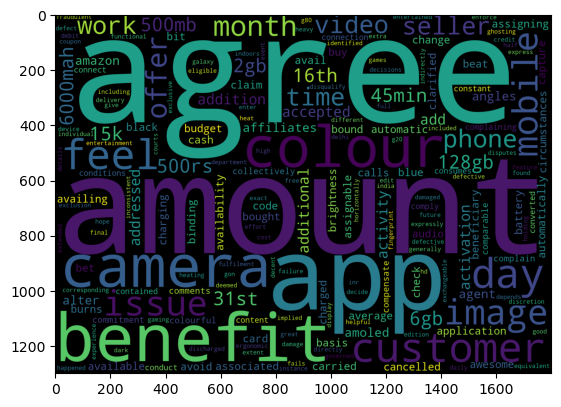

In [29]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [31]:
with open ("positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]


In [33]:
pos_text=" ".join([word for word in df if not word  in positive_words])

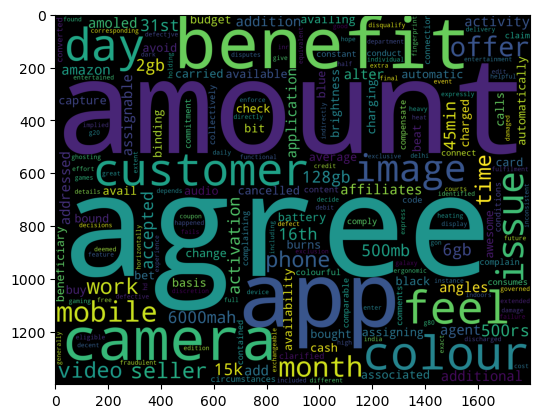

In [35]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

In [32]:
with open ("negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]    

In [34]:
neg_text=" ".join([word for word in df if not word in negative_words])

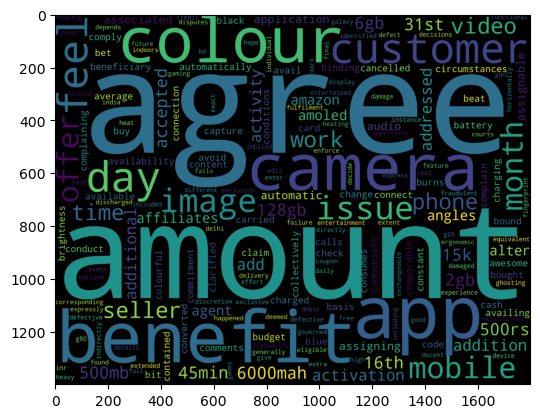

In [36]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [39]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

revd[["subjectivity", "polarity"]] = revd.apply(sentiment_analysis, axis=1)
revd

,review,subjectivity,polarity
0,"\noffer terms and conditions 1. this offer (""offer"") is a limited time promotional offer provided by savex and is made available on the website www.amazon.in and the corresponding mobile site and mobile application (collectively, ""amazon.in"") by amazon seller services private limited (""amazon""). 2. these offer terms and conditions (""offer terms"") are in addition to the amazon.in conditions of use & sale to which you agree by using amazon.in. to the extent the conditions of use are inconsistent with these offer terms; these offer terms will prevail with respect to this offer only. 3. this offer is valid from 16th sep ’22 to 31st mar 2023 to (both days included) (""offer period""), unless extended or revoked by the eligible sellers in its sole discretion, without the requirement of any pri...",0.500739,0.066787
1,"\ncamera : great. no words for it's outstanding performance at price of 10,500rs. it can even beat smartphones upto 15,000 rs in camera department.battery : for 45min ~ 5% charging gets discharged (used for quora, twitter, pininterest)for 18 min ~ 5% discharged(used for upto 500mb gaming apps)so, decent battery.remember, display being amoled, full hd+ with high ppi consumes more battery.generally, battery stays one and a half day, if used throughout the day without gaming.display - very colourful, being amoled. but, only once i saw some colourful lines passing horizontally on display. but, that was only once. i hope it doesn't occur again.edit : it happened because, i removed some permissions from system apps. it never happened again.tip : try to keep brightness low, prefer dark mode...",0.467966,0.083627
2,"\ni have always liked black, this time by mistake i placed blue, but, it looks different, good. i have not thoroughly tested it yet, but with my research and and bit of usage i would ask you to go for it, under 15k 6gb/128gb variant. yes it is not meant for gaming, yet quite good for video content experience. it is a functional device at this budget, ergonomic is up to mark, camera quality is decent, ui is smooth, tends to heat up, but natural as it has 6000mah battery to compensate and g20 processor need. overall i am rating it 4 out of five.\n",0.470000,0.250000
3,"\n the media could not be loaded.\n before you buy m32 just think what type of user are you.i could see so many comments complaining about the performance of this phone. but m32 was not made for gaming or multitasking. it's for people who use mobile for normal tasks rare multitasking and mostly for content viewing.simply it's the best display for watching movies, videos and much more. no other display can show black better than a super amoled. almost perfect colour, pitch black and almost 170° viewing angles.a day long battery life.what else do you need for entertainment?probably nothing.the cameras are good at outdoor use and may struggle indoors. audio is more than enough both for calls and content viewing. wifi and sim signal depends on individual....",0.543205,0.400865
4,\ni bought samsung galaxy m32 prime edition u give me three month free subscription but i am able to connect\n,0.712500,0.450000
...,...,...,...
355,\nfingerprint work good..battery life is good. camera feature and quality average...this product good for parents.\n,0.600000,0.700000
356,,0.000000,0.000000
357,\na great product if you buy this phone during the offer times\n,0.750000,0.800000
358,\nit works good so far\n,0.800000,0.400000


In [41]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
revd["analysis"] = revd["polarity"].apply(analysis)
revd

,review,subjectivity,polarity,analysis
0,"\noffer terms and conditions 1. this offer (""offer"") is a limited time promotional offer provided by savex and is made available on the website www.amazon.in and the corresponding mobile site and mobile application (collectively, ""amazon.in"") by amazon seller services private limited (""amazon""). 2. these offer terms and conditions (""offer terms"") are in addition to the amazon.in conditions of use & sale to which you agree by using amazon.in. to the extent the conditions of use are inconsistent with these offer terms; these offer terms will prevail with respect to this offer only. 3. this offer is valid from 16th sep ’22 to 31st mar 2023 to (both days included) (""offer period""), unless extended or revoked by the eligible sellers in its sole discretion, without the requirement of any pri...",0.500739,0.066787,Positive
1,"\ncamera : great. no words for it's outstanding performance at price of 10,500rs. it can even beat smartphones upto 15,000 rs in camera department.battery : for 45min ~ 5% charging gets discharged (used for quora, twitter, pininterest)for 18 min ~ 5% discharged(used for upto 500mb gaming apps)so, decent battery.remember, display being amoled, full hd+ with high ppi consumes more battery.generally, battery stays one and a half day, if used throughout the day without gaming.display - very colourful, being amoled. but, only once i saw some colourful lines passing horizontally on display. but, that was only once. i hope it doesn't occur again.edit : it happened because, i removed some permissions from system apps. it never happened again.tip : try to keep brightness low, prefer dark mode...",0.467966,0.083627,Positive
2,"\ni have always liked black, this time by mistake i placed blue, but, it looks different, good. i have not thoroughly tested it yet, but with my research and and bit of usage i would ask you to go for it, under 15k 6gb/128gb variant. yes it is not meant for gaming, yet quite good for video content experience. it is a functional device at this budget, ergonomic is up to mark, camera quality is decent, ui is smooth, tends to heat up, but natural as it has 6000mah battery to compensate and g20 processor need. overall i am rating it 4 out of five.\n",0.470000,0.250000,Positive
3,"\n the media could not be loaded.\n before you buy m32 just think what type of user are you.i could see so many comments complaining about the performance of this phone. but m32 was not made for gaming or multitasking. it's for people who use mobile for normal tasks rare multitasking and mostly for content viewing.simply it's the best display for watching movies, videos and much more. no other display can show black better than a super amoled. almost perfect colour, pitch black and almost 170° viewing angles.a day long battery life.what else do you need for entertainment?probably nothing.the cameras are good at outdoor use and may struggle indoors. audio is more than enough both for calls and content viewing. wifi and sim signal depends on individual....",0.543205,0.400865,Positive
4,\ni bought samsung galaxy m32 prime edition u give me three month free subscription but i am able to connect\n,0.712500,0.450000,Positive
...,...,...,...,...
355,\nfingerprint work good..battery life is good. camera feature and quality average...this product good for parents.\n,0.600000,0.700000,Positive
356,,0.000000,0.000000,Neutral
357,\na great product if you buy this phone during the offer times\n,0.750000,0.800000,Positive
358,\nit works good so far\n,0.800000,0.400000,Positive


In [42]:
revd['analysis'].value_counts()

Positive    324
Neutral      36
Name: analysis, dtype: int64

In [43]:
#positive comments
((324)/(324+36))*100

90.0

In [44]:
#neutral comments
((36)/(324+36))*100

10.0

# there are no negative comments for the product by customer reviews so the reach of the product to the public is well received 